# Modeling reddit comment score


Feature selection
 

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk

In [7]:
df=pd.read_csv("training_comments.csv")
df.head()

C:\Users\You-Myeong\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (6,7,9,11,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups
0,Voerendaalse,&gt; Subsequent validation using a separate va...,"&lt;div class=""md""&gt;&lt;blockquote&gt;\n&lt;...",0,1446262140,1446233340,NaN,0,1446234176.0,0,cwipf39,NaN,t3_3qvj7a,t1_cwipf39,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",1685,science,1685
1,Bloomsey,Peer-reviewed article: http://www.cell.com/can...,"&lt;div class=""md""&gt;&lt;p&gt;Peer-reviewed a...",0,1446260748,1446231948,NaN,0,False,0,cwiohv5,False,t3_3qvj7a,t1_cwiohv5,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",660,science,660
2,schnupfndrache7,is this as revolutionary as it sounds?,"&lt;div class=""md""&gt;&lt;p&gt;is this as revo...",0,1446264074,1446235274,NaN,0,False,0,cwiqorg,NaN,t3_3qvj7a,t1_cwiqorg,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",275,science,275
3,geoffp82,And then what? Full body MRI?,"&lt;div class=""md""&gt;&lt;p&gt;And then what? ...",0,1446262287,1446233487,NaN,0,False,0,cwipio1,NaN,t3_3qvj7a,t1_cwipio1,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",64,science,64
4,momoneymoproblemss,Is it weird I would like to take this test on ...,"&lt;div class=""md""&gt;&lt;p&gt;Is it weird I w...",0,1446263469,1446234669,NaN,0,False,0,cwiqags,NaN,t3_3qvj7a,t1_cwiqags,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",131,science,131


In [8]:
df.shape

(109982, 20)

## We clean the datahere and get rid of any data with 'nan' in submission time

In [9]:
missing_index = df['created_utc'].index[df['created_utc'].apply(np.isnan)]

In [10]:
missing_index

Int64Index([3721, 3722, 34590, 34591, 38170, 38171, 40303, 40304, 59028, 59029, 59030, 60336, 60337, 69971, 69972, 78711, 78712, 85772, 85773, 85774, 85775, 86773, 86774, 87189, 87190, 91818, 91819, 91973, 91974, 93877, 93878, 94071, 94072], dtype='int64')

In [11]:
#Drop all the values that have nan inside 
list1 = []
for index in missing_index:
    list1.append(index)

In [12]:
df = df.drop(df.index[list1])

In [13]:
df.shape

(109949, 20)

## Feature Engineering

We added the following features from the comment data

1.)*com_len* - Length of comment 

2.) *word_num* - number of words 

3.)number of swear words  - swear_num

4.)Sentiment Analysis score (to be added soon) - Sentiment 

5.)tokenized sentence  - token 

6.) time of submissions - redivided into 10 min intervals 

7.) lem - lemminized and cleaned up texts

8.) over100 -  1 if over 100 upvote score

9.) filter stop words out 

In [137]:
#Function to tokenize comments
from string import punctuation
from nltk.tokenize import RegexpTokenizer
def tokenize(comment):
    tokenizer = RegexpTokenizer(r'\w+')
    x = ''.join(c for c in comment if c not in punctuation)
    return tokenizer.tokenize(x)
#Function to calculate length of comment
def len_com(comment):
    return len(str(comment))
#function to calculate number of words
def word_num(token):
    return len(token)

#helper function to clean stop words and whatnot.
from nltk.corpus import stopwords
def wordclean(sentence):
    filtered_words = [word for word in sentence if word not in stopwords.words('english')]
    return (' '.join(filtered_words))
    

In [138]:
#function for telling whether over 100 upvote or not
def over100(upvote):
    if upvote > 100:
        return 1
    else:
        return 0

We add the new columns here

In [139]:
df['com_len'] = df.body.apply(len_com)
df['token'] = df.body.apply(tokenize)
df['word_num'] = df.token.apply(word_num)
df['over100'] = df.ups.apply(over100)
df['clean_body'] = df.token.apply(wordclean)

In [140]:
df.head()

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,com_len,token,word_num,over100,time,clean_body
0,Voerendaalse,&gt; Subsequent validation using a separate va...,"&lt;div class=""md""&gt;&lt;blockquote&gt;\n&lt;...",0,1446262140,1446233340,NaN,0,1446234176.0,0,cwipf39,NaN,t3_3qvj7a,t1_cwipf39,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",1685,science,1685,1083,"[gt, Subsequent, validation, using, a, separat...",191,1,93,gt Subsequent validation using separate valida...
1,Bloomsey,Peer-reviewed article: http://www.cell.com/can...,"&lt;div class=""md""&gt;&lt;p&gt;Peer-reviewed a...",0,1446260748,1446231948,NaN,0,False,0,cwiohv5,False,t3_3qvj7a,t1_cwiohv5,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",660,science,660,85,"[Peerreviewed, article, httpwwwcellcomcancerce...",3,1,91,Peerreviewed article httpwwwcellcomcancercella...
2,schnupfndrache7,is this as revolutionary as it sounds?,"&lt;div class=""md""&gt;&lt;p&gt;is this as revo...",0,1446264074,1446235274,NaN,0,False,0,cwiqorg,NaN,t3_3qvj7a,t1_cwiqorg,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",275,science,275,38,"[is, this, as, revolutionary, as, it, sounds]",7,1,96,revolutionary sounds
3,geoffp82,And then what? Full body MRI?,"&lt;div class=""md""&gt;&lt;p&gt;And then what? ...",0,1446262287,1446233487,NaN,0,False,0,cwipio1,NaN,t3_3qvj7a,t1_cwipio1,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",64,science,64,29,"[And, then, what, Full, body, MRI]",6,0,93,And Full body MRI
4,momoneymoproblemss,Is it weird I would like to take this test on ...,"&lt;div class=""md""&gt;&lt;p&gt;Is it weird I w...",0,1446263469,1446234669,NaN,0,False,0,cwiqags,NaN,t3_3qvj7a,t1_cwiqags,NaN,t3_3qvj7a,"{u'kind': u'Listing', u'data': {u'modhash': No...",131,science,131,153,"[Is, it, weird, I, would, like, to, take, this...",31,1,95,Is weird I would like take test monthly basis ...


In [141]:
#function to divide and categorize submission time by 10 min eachvectorizer = CountVectorizer(min_df=0)
import datetime
def convert_time(time):
    Hour = datetime.datetime.fromtimestamp(time).strftime('%H')
    Min = datetime.datetime.fromtimestamp(time).strftime('%M')
    return int(Hour)*6 + (round(int(Min), -1)/10)

In [142]:
df['time'] = df.created_utc.apply(convert_time)

The number of votes needed to break the 95th percentile is...
82.0


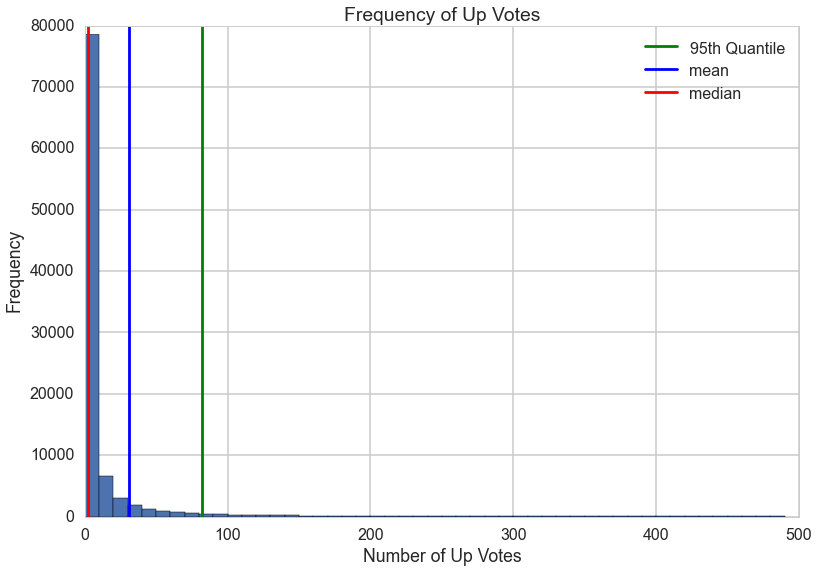

In [110]:
plt.hist(df.ups, bins = np.arange(0,500,10))
plt.xlabel('Number of Up Votes')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes")
p95 = np.percentile(df.ups, 95)
plt.axvline(p95, color='g', label = '95th Quantile')
plt.axvline(np.average(df.ups), label = "mean", c = 'b')
plt.axvline(np.median(df.ups) , label = "median", c = 'r')
plt.legend(frameon=False, loc='upper right')
print "The number of votes needed to break the 95th percentile is..." 
print p95

As we see from the frequency of up votes histogram it is clear that the majority of comments get upvotes on the lower end ranging from 0 to 10. We also see that the median is significantly lower than the mean, thus showing that the data is skewed to the right with many outliers bringing the mean up to be higher than its median. Furthermore, we can also see that the 95th percentile is set at 82 votes, thus showing that the top 5% comments have an up vote of 82 or more. These top 5% comments will be the ones we will be most interested in as we continue our search for the best comments that match a certain topic of interest.

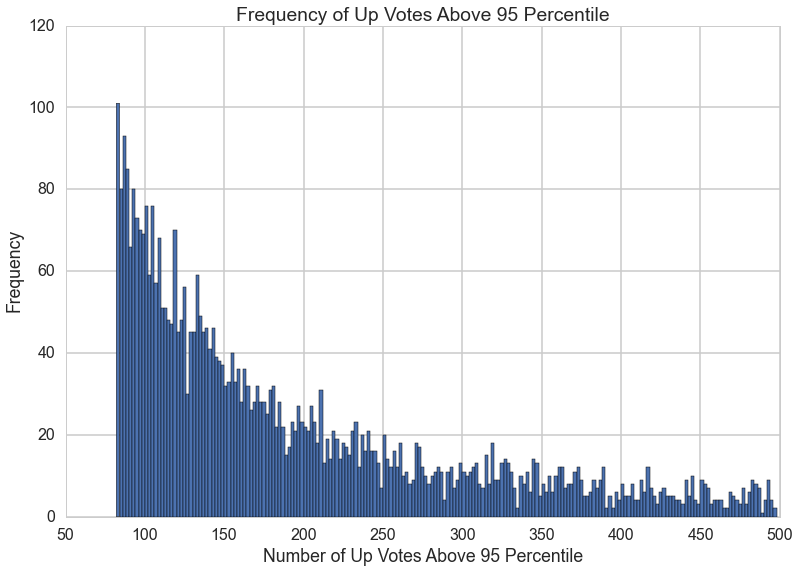

In [91]:
plt.hist(df.ups, bins = np.arange(82,500,2))
plt.xlabel('Number of Up Votes Above 95 Percentile')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes Above 95 Percentile")

Here we graphed the comments that recieved an up vote of 82 or higher which landed them at or above the 95 percentile. We see here that the frequency of the upvotes decrease rapidly as we get to the higher end of the upvotes, with the 82 up votes having the highest frequency among all others. This is to be expected as very few comments get upvotes into the 400 and 500 range, however, these may be the comments that we are most interested in for our prediction model.

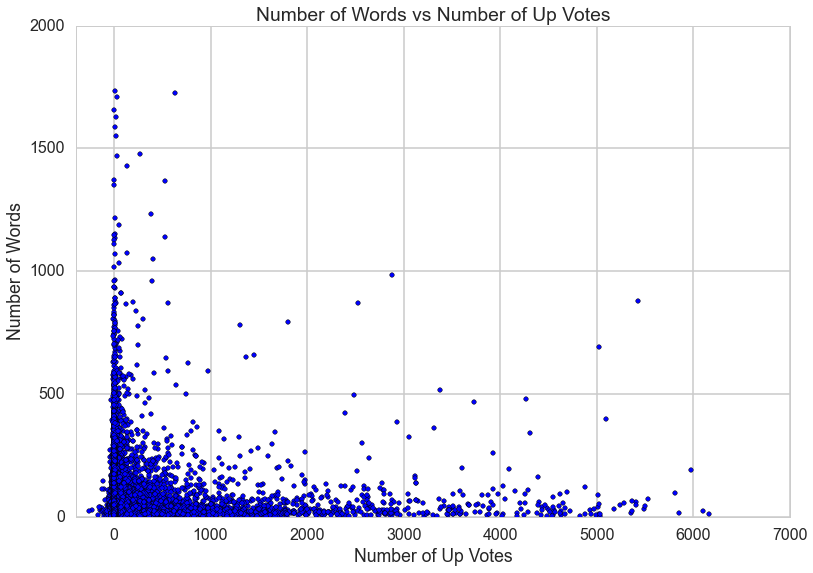

In [70]:
plt.scatter(df.ups, df.word_num)
plt.xlim([-400,7000])
plt.ylim([0,2000])
plt.xlabel("Number of Up Votes")
plt.ylabel("Number of Words")
plt.title("Number of Words vs Number of Up Votes")

We see in our words versus up votes scatter plot that in general, as the number of upvotes increase for a certain comment, the number of words used in that certain comment decreases. Thus suggesting that the comments with the most up votes are the ones that uses few words. Whereas comments with 1000 or 1500 words get very few up votes. In addition, it is interesting to note that a few comments land in the 5000 to 6000 up votes category. It would be interesting to see what the comments are for these extreme cases.

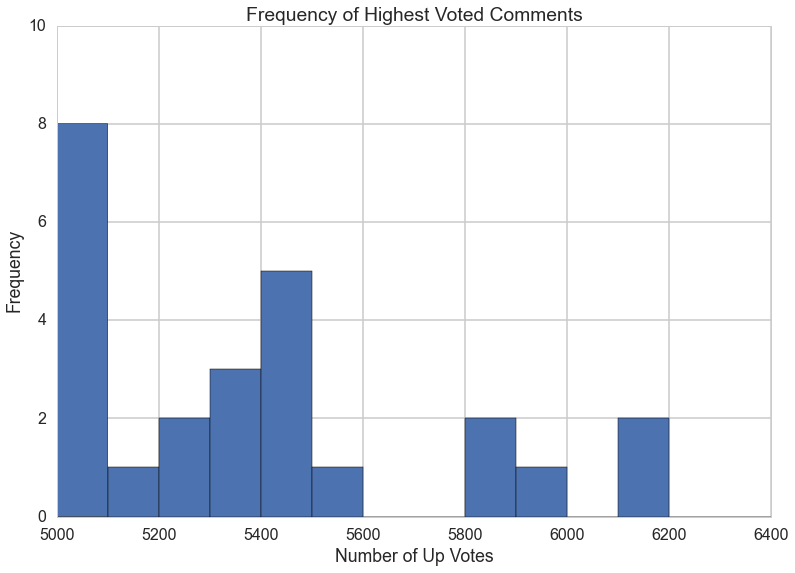

In [129]:
plt.hist(df.ups, bins = np.arange(5000,6500,100))
plt.ylim([0,10])
plt.xlabel("Number of Up Votes")
plt.ylabel("Frequency")
plt.title("Frequency of Highest Voted Comments")

Here we see that very few comments recieve up votes pass 5000 with only a handfull of comments that crosses this mark.

In [89]:
c=df.groupby('over100').count()
c

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,com_len,token,word_num,time
over100,,,,,,,,,,,,,,,,,,,,,,,,
0,105168,105168,105168,105168,105168,105168,31,105168,105168,105168,105168,0,105168,105168,0,105168,43417,105168,105168,105168,105168,105168,105168,105168
1,4781,4781,4781,4781,4781,4781,1,4781,4781,4781,4781,1,4781,4781,0,4781,4768,4781,4781,4781,4781,4781,4781,4781


What we see here is the difference between the number of comments that get over 100 up votes and the number of comments that don't. Clearly, many comments are filtered out from the 100 threshold. We may consider using 100 up votes as a cut off point for our prediction model.

In [93]:
s=df.groupby('subreddit').count()
s

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,ups,com_len,token,word_num,over100,time
subreddit,,,,,,,,,,,,,,,,,,,,,,,,
dataisbeautiful,11892,11892,11892,11892,11892,11892,3,11892,11892,11892,11892,0,11892,11892,0,11892,4163,11892,11892,11892,11892,11892,11892,11892
news,43591,43591,43591,43591,43591,43591,0,43591,43591,43591,43591,0,43591,43591,0,43591,19820,43591,43591,43591,43591,43591,43591,43591
science,9066,9066,9066,9066,9066,9066,29,9066,9066,9066,9066,1,9066,9066,0,9066,4615,9066,9066,9066,9066,9066,9066,9066
worldnews,45400,45400,45400,45400,45400,45400,0,45400,45400,45400,45400,0,45400,45400,0,45400,19587,45400,45400,45400,45400,45400,45400,45400


Here we see that for the subreddit categories that we have, worldnews has the highest amount of authors writing in that category followed by news, dataisbeautiful, and science. These sub categories may give us insights as to what cateogires are popular and where we should target the majority of our prediction model on.

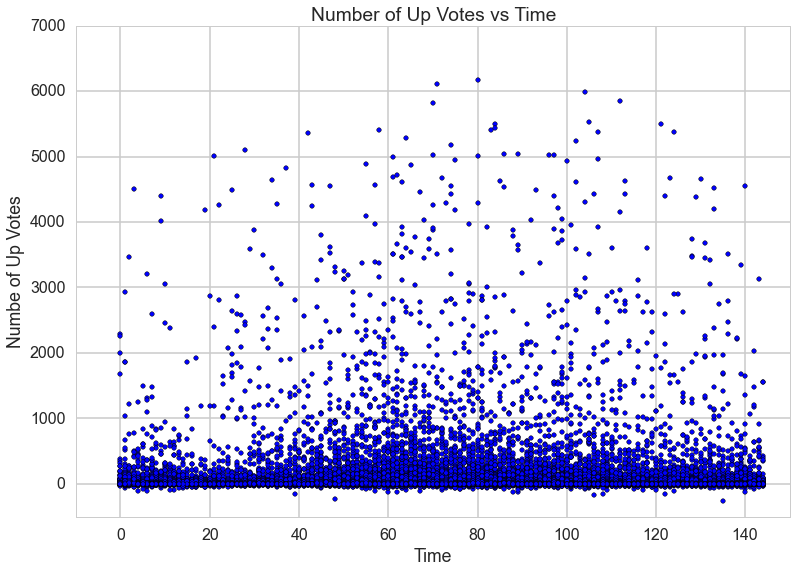

In [106]:
plt.scatter(df.time, df.ups)
plt.xlim([-10,150])
plt.ylim([-500,7000])
plt.xlabel("Time")
plt.ylabel("Numbe of Up Votes")
plt.title("Number of Up Votes vs Time")

Here we see a scatter plot of number of up votes versus time. As indicated by the randomly scattered plot there seem to be no correlation between when the comment is posted, and how many up votes the comment gets.

# Jiahui Modeling Samples

# Some Modelling Methods 


In [143]:
priorp = df.over100.mean()
priorn = 1 - priorp
priorp, priorn

(0.04348379703316992, 0.95651620296683)

In [144]:
import requests

headers = {
    "User-Agent": "don't rate limit me"
}

def get_active_users(subreddit):
    url = "http://www.reddit.com/r/{}/about.json".format(subreddit)
    resp = requests.get(url, headers=headers)
    if not resp.ok:
        # handle request error, return -1?
        return -1
    content = resp.json()
    return content["data"]["accounts_active"]

The number of votes needed to break the 95th percentile is...
82.0


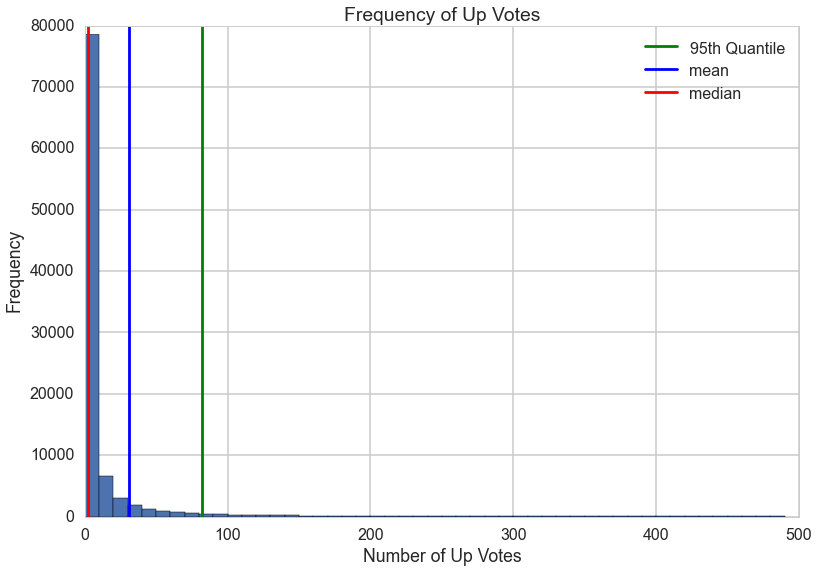

In [50]:
plt.hist(df.ups, bins = np.arange(0,500,10))
plt.xlabel('Number of Up Votes')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes")
p95 = np.percentile(df.ups, 95)
plt.axvline(p95, color='g', label = '95th Quantile')
plt.axvline(np.average(df.ups), label = "mean", c = 'b')
plt.axvline(np.median(df.ups) , label = "median", c = 'r')
plt.legend(frameon=False, loc='upper right')
print "The number of votes needed to break the 95th percentile is..." 
print p95

# # Filtered has only above 95th percentile

In [56]:
filtered = df.drop(df[df.ups < p95].index)

In [57]:
hourlist = []
for i in filtered.time:
    hourlist.append(i)
    
from collections import Counter
x = Counter(hourlist).most_common()

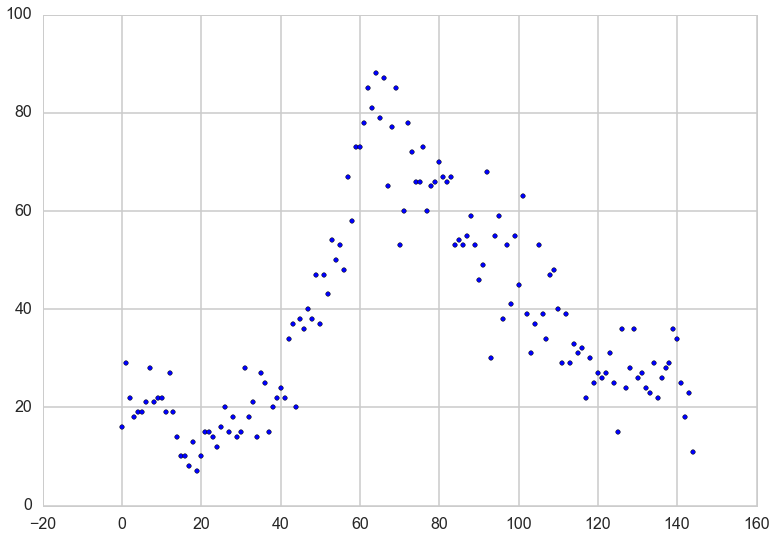

In [58]:
hour = []
percent = []
for h,f in x:
    hour.append(h)
    percent.append(f)
plt.scatter(hour,percent)

In [ ]:
# Filtered upvote

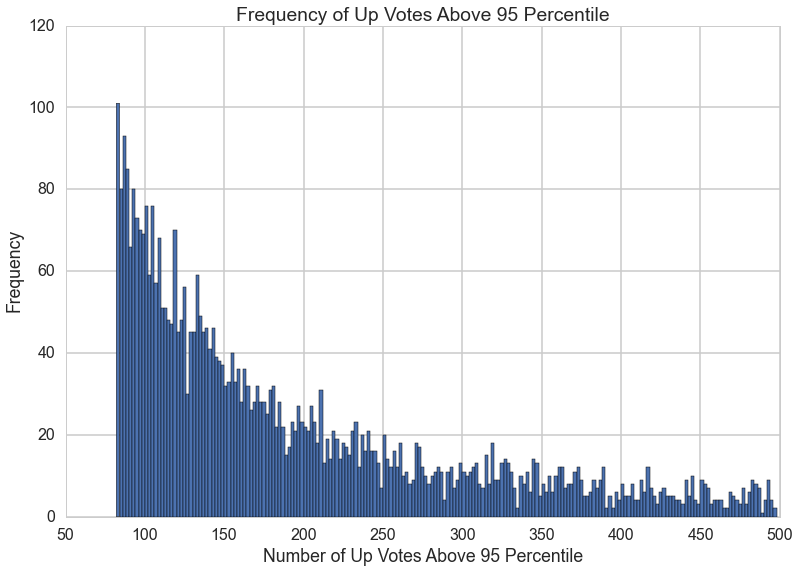

In [51]:
plt.hist(df.ups, bins = np.arange(82,500,2))
plt.xlabel('Number of Up Votes Above 95 Percentile')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes Above 95 Percentile")

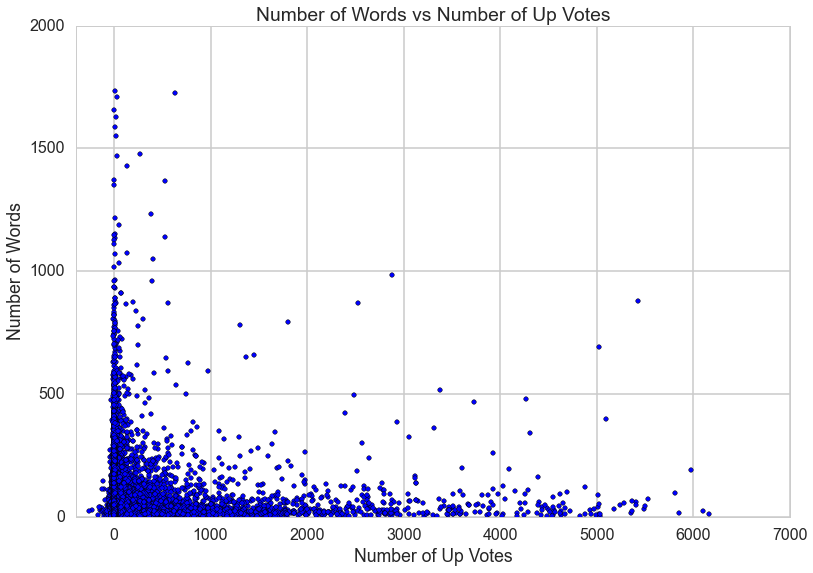

In [52]:
plt.scatter(df.ups, df.word_num)
plt.xlim([-400,7000])
plt.ylim([0,2000])
plt.xlabel("Number of Up Votes")
plt.ylabel("Number of Words")
plt.title("Number of Words vs Number of Up Votes")

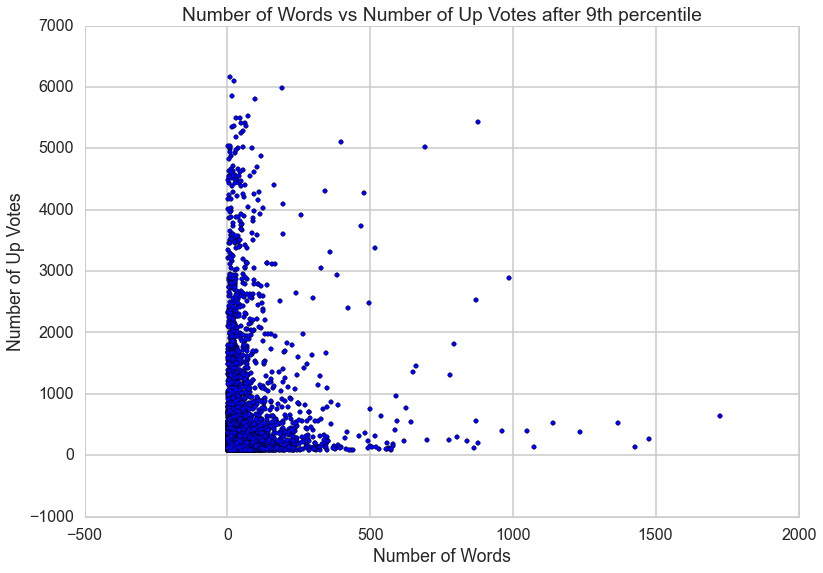

In [62]:
plt.scatter(filtered.word_num, filtered.ups)
plt.xlabel("Number of Words")
plt.ylabel( "Number of Up Votes")
plt.title("Number of Words vs Number of Up Votes after 9th percentile")

In [53]:
c=df.groupby('over100').count()
c

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,com_len,token,word_num,time
over100,,,,,,,,,,,,,,,,,,,,,,,,
0,105168,105168,105168,105168,105168,105168,31,105168,105168,105168,105168,0,105168,105168,0,105168,43417,105168,105168,105168,105168,105168,105168,105168
1,4781,4781,4781,4781,4781,4781,1,4781,4781,4781,4781,1,4781,4781,0,4781,4768,4781,4781,4781,4781,4781,4781,4781


In [54]:
s=df.groupby('subreddit').count()
s

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,ups,com_len,token,word_num,over100,time
subreddit,,,,,,,,,,,,,,,,,,,,,,,,
dataisbeautiful,11892,11892,11892,11892,11892,11892,3,11892,11892,11892,11892,0,11892,11892,0,11892,4163,11892,11892,11892,11892,11892,11892,11892
news,43591,43591,43591,43591,43591,43591,0,43591,43591,43591,43591,0,43591,43591,0,43591,19820,43591,43591,43591,43591,43591,43591,43591
science,9066,9066,9066,9066,9066,9066,29,9066,9066,9066,9066,1,9066,9066,0,9066,4615,9066,9066,9066,9066,9066,9066,9066
worldnews,45400,45400,45400,45400,45400,45400,0,45400,45400,45400,45400,0,45400,45400,0,45400,19587,45400,45400,45400,45400,45400,45400,45400


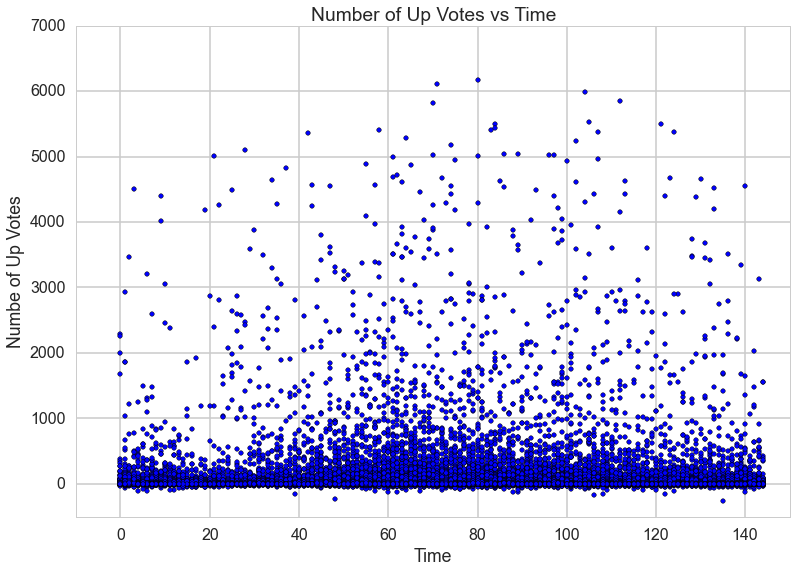

In [55]:
plt.scatter(df.time, df.ups)
plt.xlim([-10,150])
plt.ylim([-500,7000])
plt.xlabel("Time")
plt.ylabel("Numbe of Up Votes")
plt.title("Number of Up Votes vs Time")

# Some Modelling Methods 


In [163]:
df.ix[618 ]

author                                             jesuspenishasrisen
body                I'm actively synthesizing a molecule used in t...
body_html           &lt;div class="md"&gt;&lt;p&gt;I&amp;#39;m act...
controversiality                                                    0
created                                                  1.447149e+09
created_utc                                              1.447121e+09
distinguished                                                     NaN
downs                                                               0
edited                                                          False
gilded                                                              0
id                                                            cwuuad6
likes                                                             NaN
link_id                                                     t3_3s6xe6
name                                                       t1_cwuuad6
num_reports         

In [147]:
df.clean_body

0         gt Subsequent validation using separate valida...
1         Peerreviewed article httpwwwcellcomcancercella...
2                                      revolutionary sounds
3                                         And Full body MRI
4         Is weird I would like take test monthly basis ...
5         The fact pancreatic cancer one types tested st...
6         Why I get feeling like cancer curetreatment st...
7                                                   removed
8                              Cool In 20 years FDA approve
9         Looking methods use perform actual testing som...
10                                                  removed
11                                                  removed
12        Can somebody clarify test detects metastasized...
13        Came crack joke realizing subreddit I Instead ...
14        Exciting I questions The control group 55 vs 2...
15        This fantastic When I diagnosed Leukemia docto...
16        Here actual paper httpwwwcellc

In [156]:
#Naive base model for whether its good or not [ SELECTED TERRIBLE FEATURE]

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
def make_xy(x, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(x.clean_body)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (x.over100 == 1).values.astype(np.int)
    return X, y
X, y = make_xy(df)

UnicodeDecodeError: 'utf8' codec can't decode byte 0xe2 in position 618: invalid continuation byte

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 93.53%


In [150]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.95
Accuracy on test data:     0.94


In [151]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [152]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [153]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [154]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

UnicodeDecodeError: 'utf8' codec can't decode byte 0xe2 in position 618: invalid continuation byte

In [155]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

TypeError: float argument required, not NoneType

In [156]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

ValueError: negative value for max_df of min_df

In [157]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, clf.predict(xtest))

[[25663   552]
 [ 1227    46]]


In [158]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(fresh | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(fresh | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [159]:

def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(Fresh)")
    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(Fresh)")
    plt.ylabel("Number")

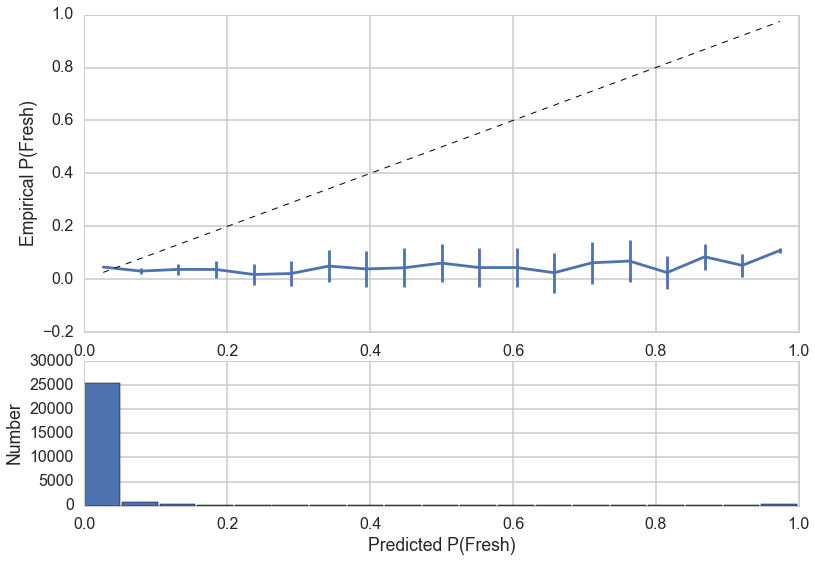

In [160]:
calibration_plot(clf, xtest, ytest)


# Regression model RMSE

In [161]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB